In [70]:
# useful imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [71]:
# Loads the data set from keras library
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [72]:
# Prints the length of train data
len(X_train)

60000

In [73]:
# Prints the length of test data
len(X_test)

10000

In [74]:
# Prints the image data at 0 index
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

5


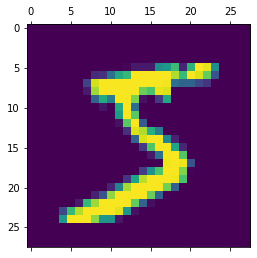

In [75]:
# Visualises the data at index 0 in training set
plt.matshow(X_train[0])
print(y_train[0])

In [76]:
# Scales the data
X_train = X_train / 255
X_test = X_test / 255

In [80]:
# Creates a simple model with imput and output layer with no hidden units
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                        keras.layers.Dense(10, activation='sigmoid')
                        ])
# Compiles the model with different parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
# Trains the model with features and associated labels
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4708 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9258


In [81]:
# Evalutes the model's performance on unseen data i.e. test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.9257


[0.2674024999141693, 0.9257000088691711]

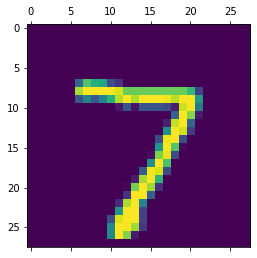

In [82]:
# Visualises the test data at index 0
plt.matshow(X_test[0])

In [83]:
# Predicts the labels for the unseen dataset
y_predicted = model.predict(X_test)

In [84]:
# Prints an 10 values for each row in test data. These values are the probability of a unseen data belonging to a particular class.
y_predicted[0]

array([1.9627303e-02, 3.3095932e-07, 5.0420105e-02, 9.5739126e-01,
       1.9352734e-03, 9.1574758e-02, 1.0682826e-06, 9.9979627e-01,
       9.1873705e-02, 6.7712379e-01], dtype=float32)

In [85]:
# Extracts the max predicted probability from the 10 predicted values for test data at index 0
np.argmax(y_predicted[0])
# Extracts the max predicted probability from the 10 predicted values for each test data
y_predicted_max = [np.argmax(i) for i in y_predicted]

In [86]:
# Creates a 10x10 confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_max)

Text(69.0, 0.5, 'True Value')

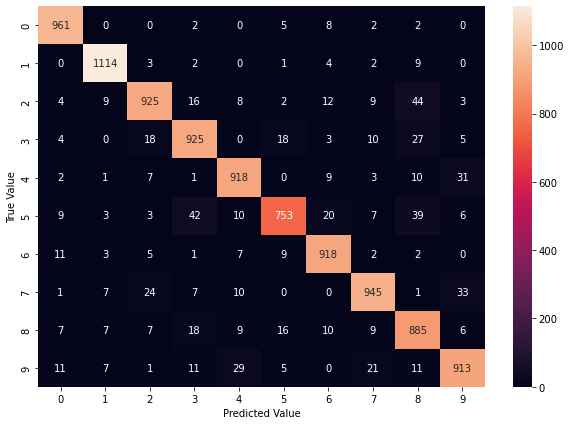

In [48]:
# Visualises the 10x10 confusion matrix using seaborn library
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [88]:
# Adds one more layer to the model i.e. a hidden layer for better performance
model_hidden = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                        keras.layers.Dense(50, activation='sigmoid'),
                        keras.layers.Dense(10, activation='sigmoid')
                        ])
model_hidden.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model_hidden.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5029 - accuracy: 0.8810
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2359 - accuracy: 0.9334
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1849 - accuracy: 0.9471
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1537 - accuracy: 0.9563
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1316 - accuracy: 0.9627


In [89]:
# Evalutes the model's performance on unseen data i.e. test data
model_hidden.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.9591


[0.1362541913986206, 0.9591000080108643]

In [90]:
# Predicts the labels for the unseen dataset
y_predicted_hidden = model_hidden.predict(X_test)
# Extracts the max predicted probability from the 10 predicted values for each test data
y_predicted_hidden_max = [np.argmax(i) for i in y_predicted_hidden]

In [91]:
# Creates a 10x10 confusion matrix
cm_hidden = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_hidden_max)

Text(69.0, 0.5, 'True Value')

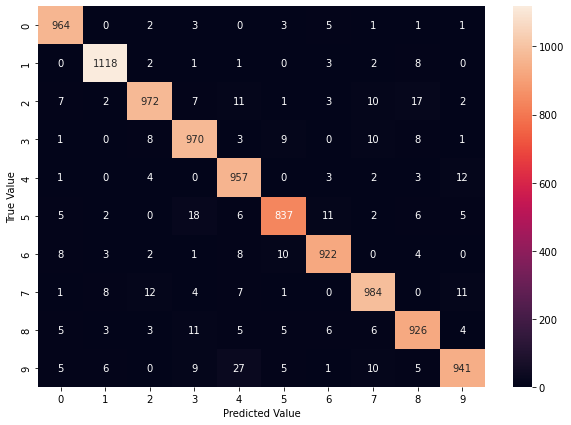

In [92]:
# Visualises the 10x10 confusion matrix using seaborn library
plt.figure(figsize=(10, 7))
sns.heatmap(cm_hidden, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')